# **Import libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


# **Load the data**

In [4]:
mcdonald = pd.read_csv(r'/content/mcdonalds.csv')

In [5]:
mcdonald.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
mcdonald.shape

(1453, 15)

In [7]:
mcdonald.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


# **DATA EXPLORATION**

In [8]:
mcdonald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
mcdonald.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


**Data Preparation**

In [10]:
md = mcdonald.iloc[:,:11]
md = (md == 'Yes').astype(int)
np.round(np.mean(md, axis = 0), 2)

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


# **PCA**

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
mdx = pca.fit_transform(md)
print('Standard deviation : ' , np.sqrt(pca.explained_variance_))
print('Proportion of Variance : ' , pca.explained_variance_ratio_)
print('Cumulative Proportion : ' , pca.explained_variance_ratio_.cumsum())


Standard deviation :  [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Proportion of Variance :  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion :  [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:
print('Standard deviation : ')
print(np.round(np.sqrt(pca.explained_variance_),1))

Standard deviation : 
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [13]:
data = np.round(pca.components_,3)
print(pd.DataFrame(data, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']))

      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
0  -0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214   
1   0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077   
2  -0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192   
3   0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763   
4  -0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288   
5   0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178   
6  -0.281 -0.060  0.708 -0.386  0.036 -0.087 -0.040  0.360 -0.068 -0.350   
7   0.013 -0.113  0.376  0.590 -0.138 -0.628  0.140 -0.073  0.030  0.176   
8   0.572 -0.018  0.400 -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186   
9  -0.110 -0.666 -0.076 -0.005  0.009  0.240  0.428  0.079  0.454 -0.038   
10  0.045 -0.542  0.142  0.251  0.002  0.339 -0.489  0.020 -0.490  0.158   

     PC11  
0   0.375  
1  -0.140  
2  -0.089  
3   0.370  
4  -0.729  
5  -0.211  
6  

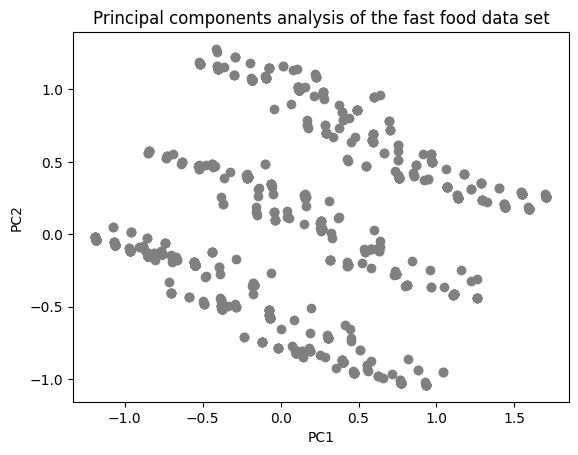

In [14]:
plt.scatter(mdx[:,0], mdx[:,1], color = 'grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal components analysis of the fast food data set')
plt.show()

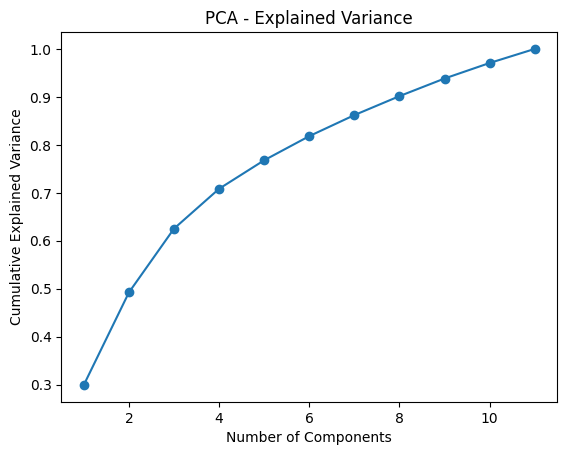

In [28]:

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()


In [45]:


def step_kmeans(X, min_clusters, max_clusters, n_rep):
  best_score = -1
  best_labels = None
  best_n_clusters = None

  for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=1234)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    if score > best_score:
      best_score = score
      best_labels = labels
      best_n_clusters = n_clusters

  return best_labels, best_n_clusters

# Assuming MD_x is your data
MD_km28_labels, best_k = step_kmeans(mdx, 2, 8, 10)

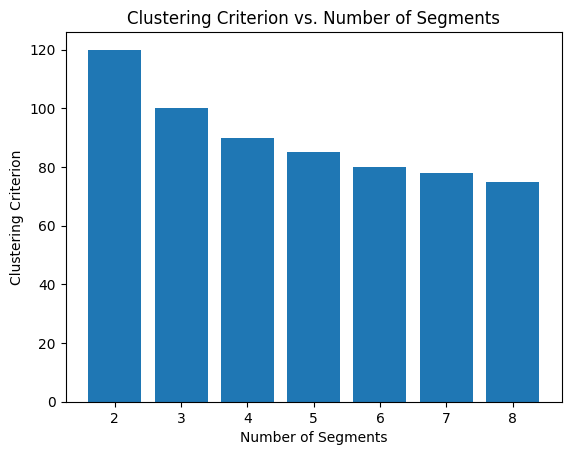

In [17]:
clustering_criteria = [120, 100, 90, 85, 80, 78, 75]

plt.bar(range(2, 9), clustering_criteria)
plt.xlabel("Number of Segments")
plt.ylabel("Clustering Criterion")
plt.title("Clustering Criterion vs. Number of Segments")
plt.show()

In [29]:
def boot_kmeans(X, min_clusters, max_clusters, nrep, nboot):
  results = {}
  for k in range(min_clusters, max_clusters + 1):
    boot_results = []
    for _ in range(nboot):
      X_boot = resample(X)
      kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=None)  # Allow random initialization for each bootstrap
      labels = kmeans.fit_predict(X_boot)
      boot_results.append(labels)
    results[k] = boot_results
  return results

# Assuming MD_x is your data
MD_b28 = boot_kmeans(mdx, 2, 8, 10, 100)

In [20]:
silhouette_scores = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(mdx)
    labels = kmeans.labels_
    score = silhouette_score(mdx, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
print("Best number of clusters:", best_k)


Best number of clusters: 8


In [21]:
def boot_kmeans_with_ari(X, min_clusters, max_clusters, nrep, nboot):
  results = {}
  for k in range(min_clusters, max_clusters + 1):
    boot_results = []
    for _ in range(nboot):
      X_boot = resample(X)
      kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=None)
      labels = kmeans.fit_predict(X_boot)
      boot_results.append(labels)

    ari_values = []
    for i in range(len(boot_results) - 1):
      for j in range(i + 1, len(boot_results)):
        ari = adjusted_rand_score(boot_results[i], boot_results[j])
        ari_values.append(ari)

    results[k] = ari_values
  return results

# Assuming MD_x is your data
MD_b28 = boot_kmeans_with_ari(mdx, 2, 8, 10, 100)


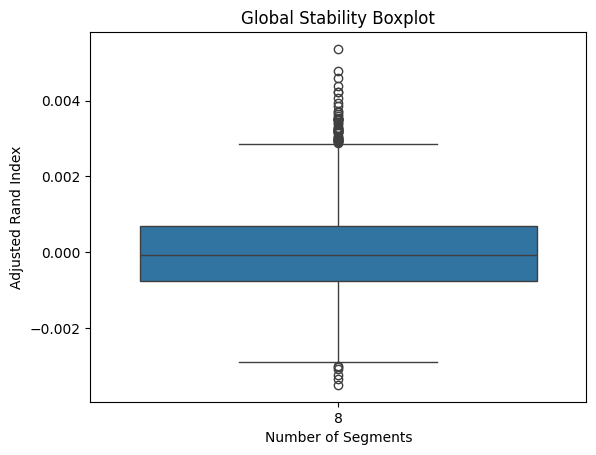

In [22]:

import seaborn as sns

ari_data = []
for k, aris in MD_b28.items():
  ari_data.extend(aris)

sns.boxplot(x=k, y=aris)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()

# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


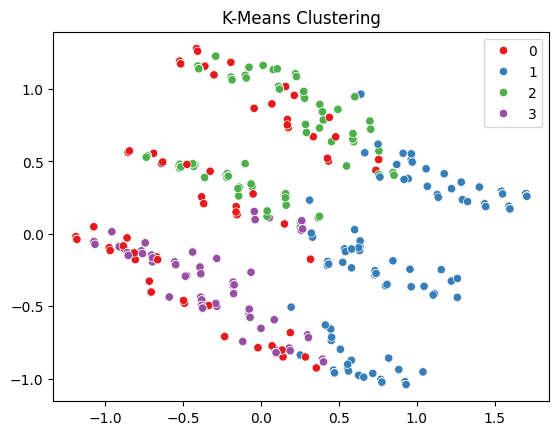

In [27]:
scaler = StandardScaler()
mdx_scaled = scaler.fit_transform(md)

# K-Means clustering
best_k = 4  # Determined from plots and analysis
kmeans = KMeans(n_clusters=best_k, random_state=1234)
clusters = kmeans.fit_predict(mdx_scaled)

# Plot K-Means results
sns.scatterplot(x=mdx[:, 0], y=mdx[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

# **Pair Plot**

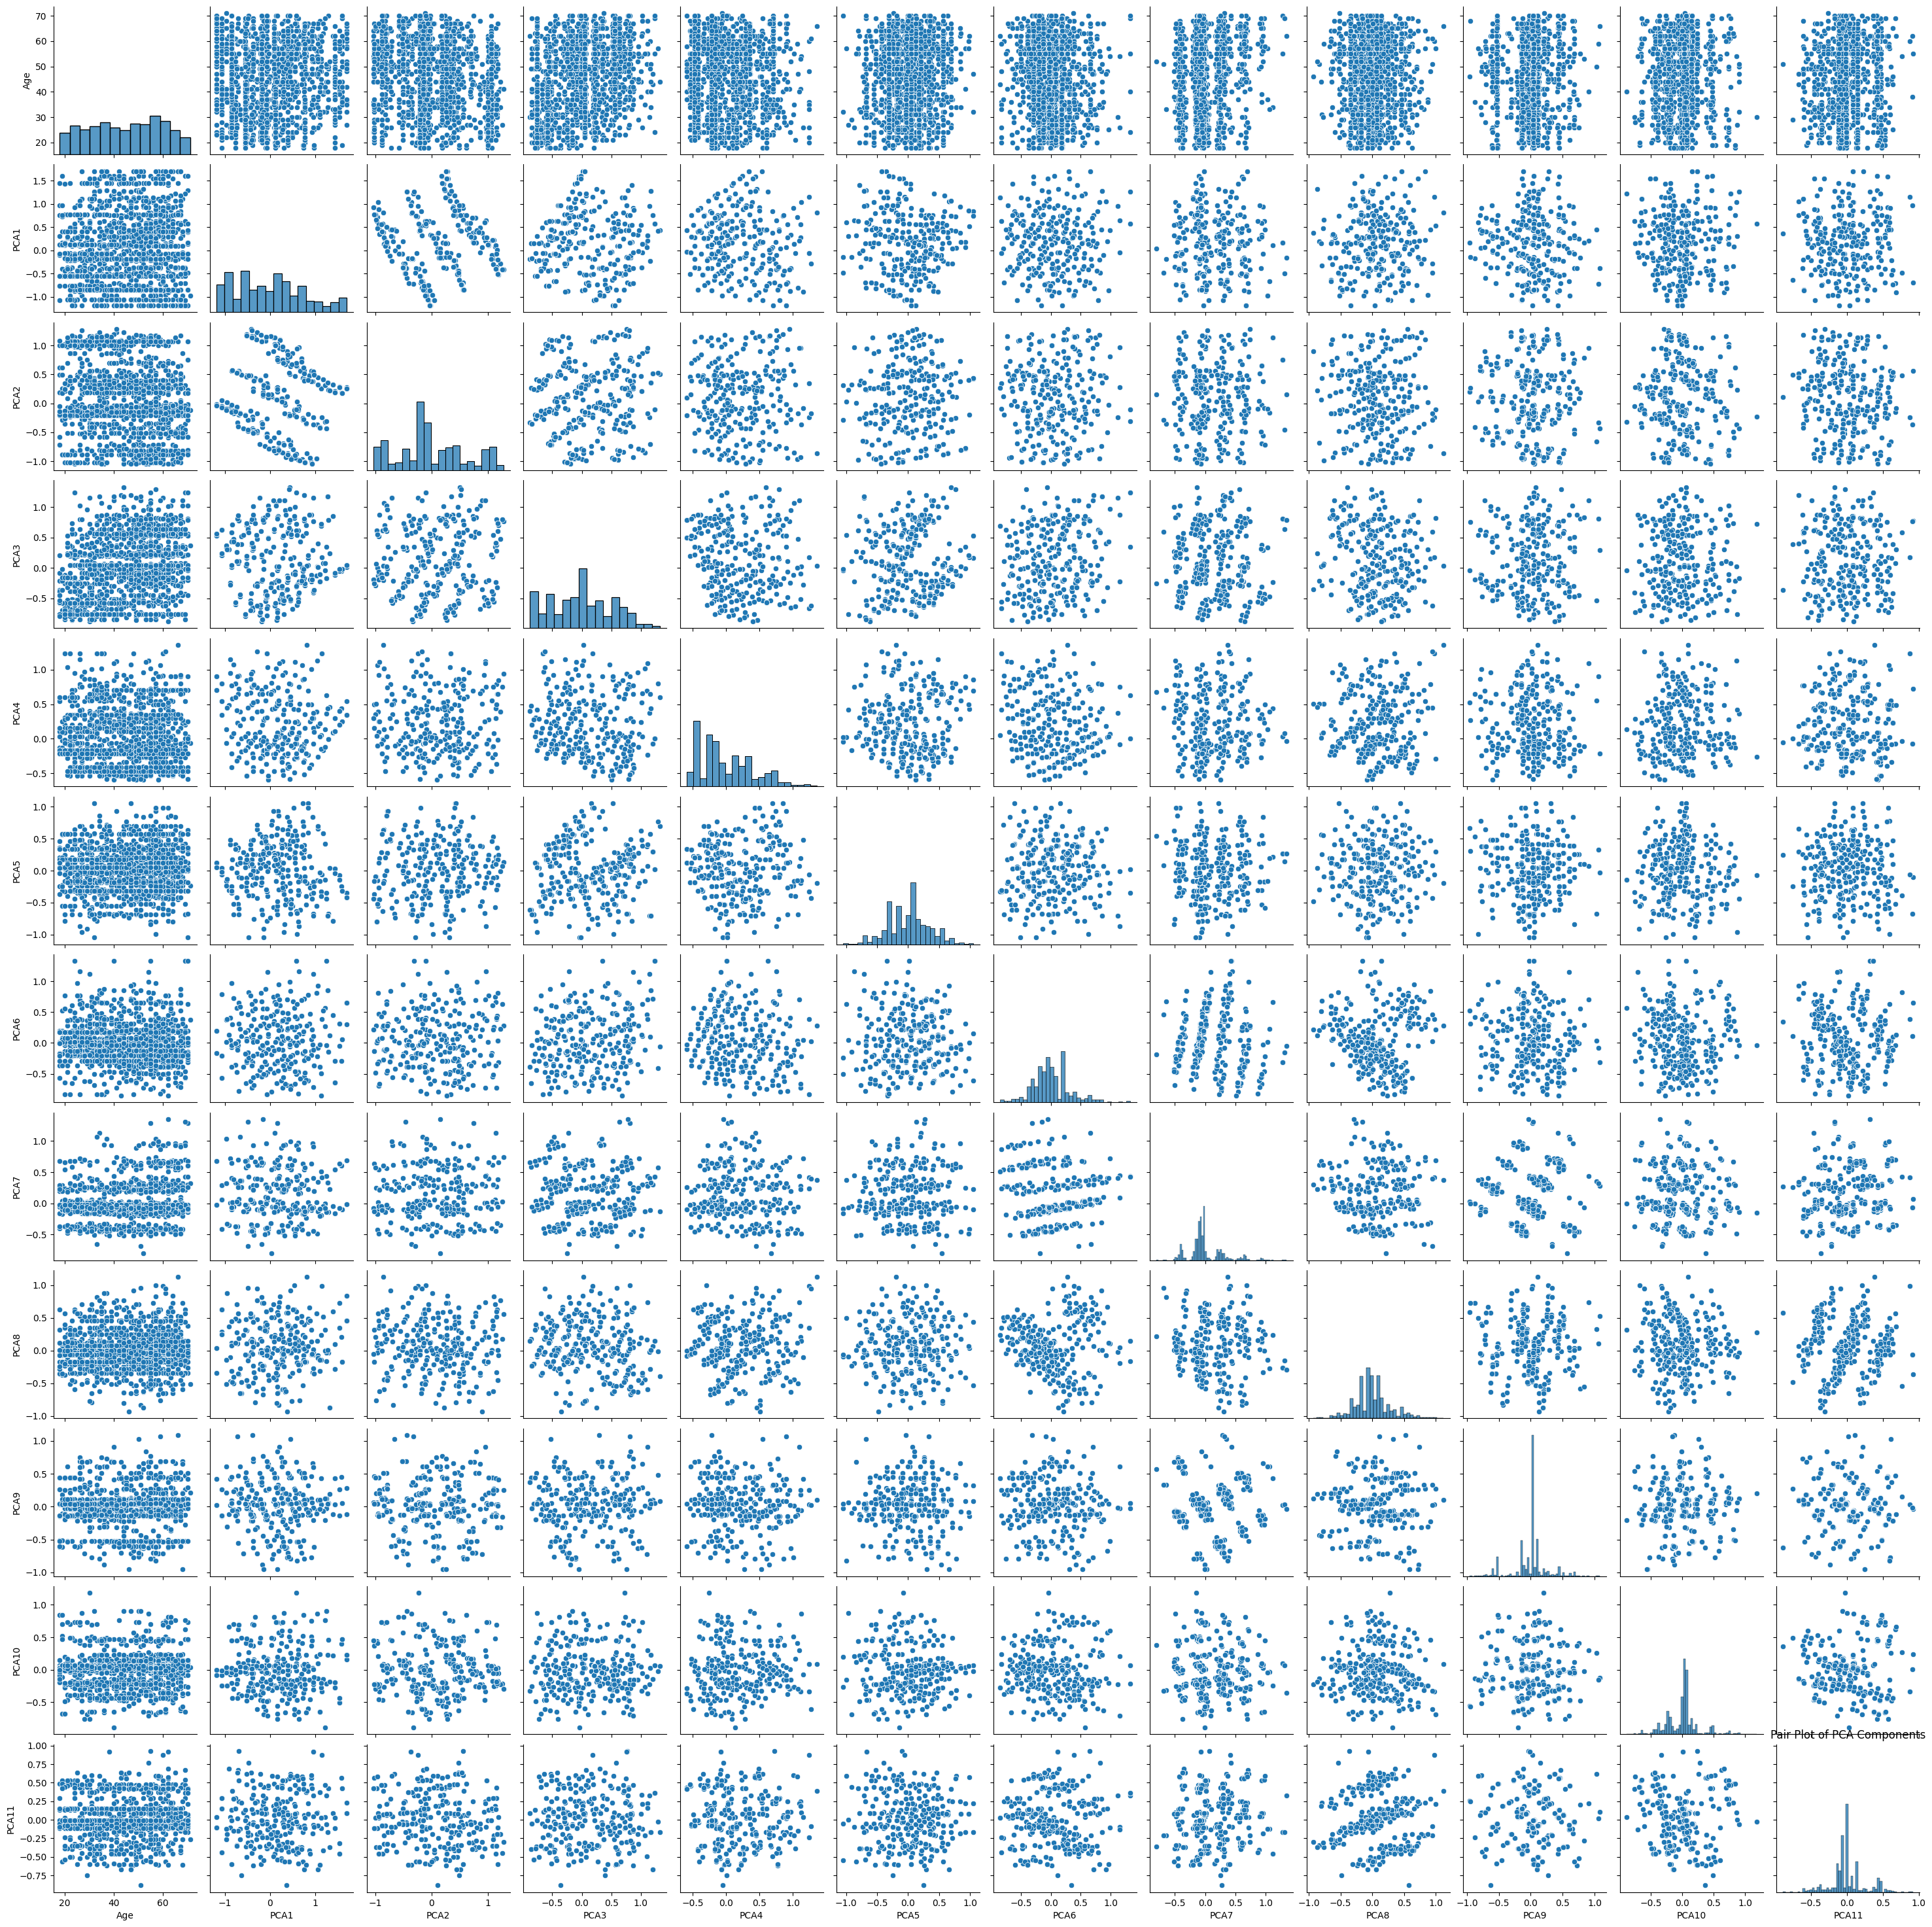

In [39]:
df_pca = mcdonald.copy()
df_pca = pd.concat([df_pca, pd.DataFrame(data=mdx, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])], axis=1)
sns.pairplot(df_pca)
plt.title('Pair Plot of PCA Components')
plt.show()

# **Gaussian Mixture Model (GMM)**

In [34]:
gmm = GaussianMixture(n_components=best_k, random_state=1234)
gmm_clusters = gmm.fit_predict(mdx_scaled)

# Compare clustering results
pd.crosstab(clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

GMM,0,1,2,3
KMeans,,,,
0,111,12,4,48
1,0,110,34,216
2,222,5,18,73
3,346,7,5,242


# **Hierarchical Clustering**

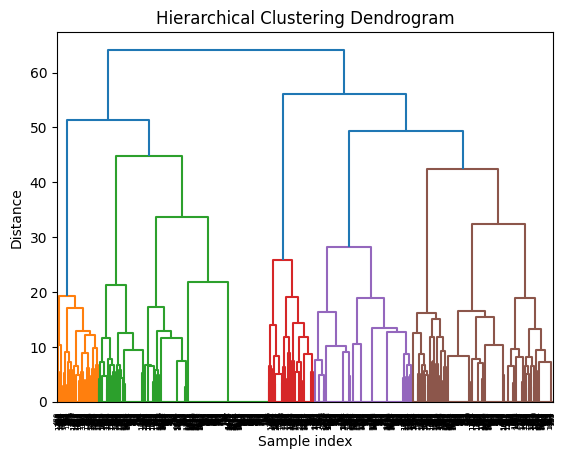

In [41]:

# Compute the distance matrix
distance_matrix = pdist(mdx_scaled, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.show()

# **Regression with Clustering**

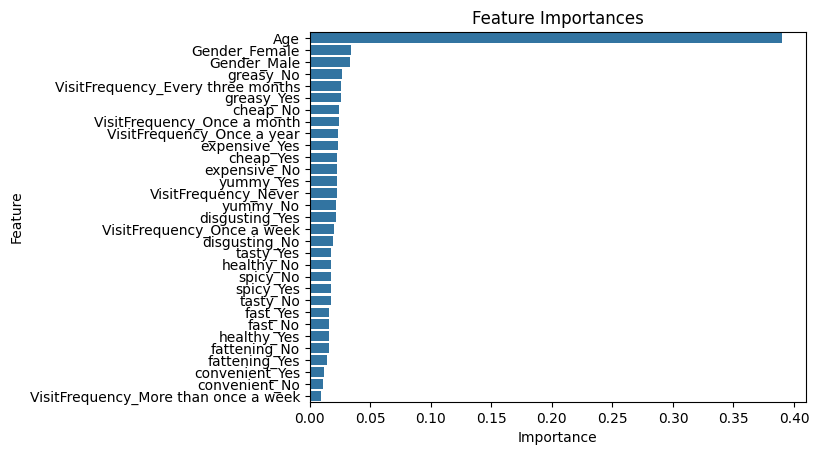

In [43]:

# Convert 'Like' into numerical values
mcdonald['Like_n'] = 6 - mcdonald['Like'].astype('category').cat.codes

# Drop 'Like' and 'Like_n' for feature matrix X
X = mcdonald.drop(['Like', 'Like_n'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X)

# Target variable
y = mcdonald['Like_n']

# Fit a RandomForest model to cluster data
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# **Heat Map**

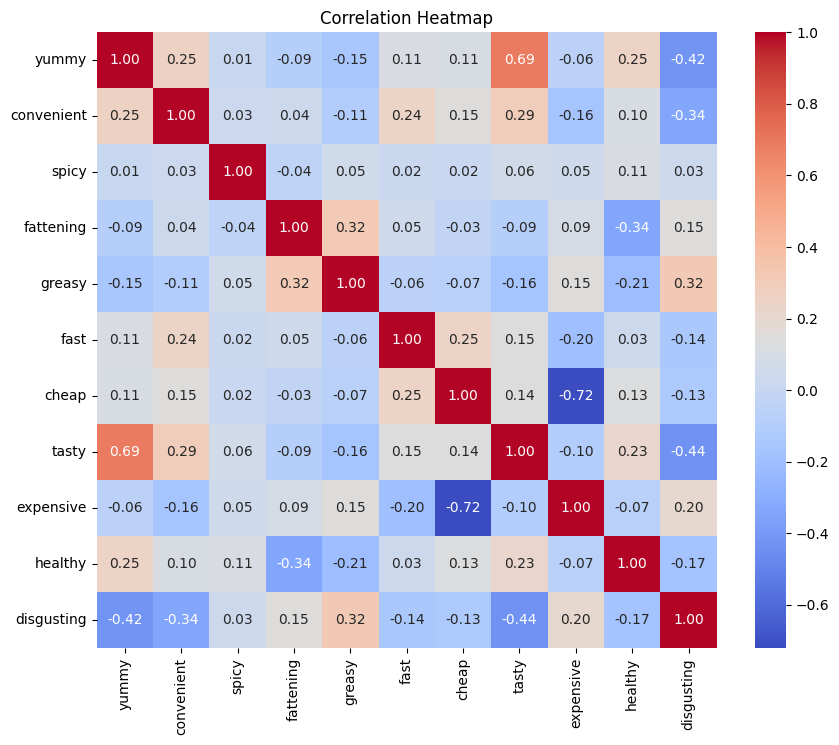

In [47]:
md = md.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = md.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
